# DAV 6150 Project 2 (Module 9)

## Introduction:  
Most online retailers are prolific users of data science methods for a variety of purposes, including fraud 
detection, personalized marketing, price optimization, upselling, and inventory management. Of particular 
interest to most online retailers is whether or not a site visitor ends up executing a purchase while engaged 
with the web site. Websites are capable of capturing a wide variety of metrics any time someone accesses 
one of their web pages, including the recording of the ID of the specific web page visited, the ID's of any items 
the user either hovered over or clicked on, the elapsed time spent by the user on the page, etc. Online 
retailers often use such data to try to determine whether or not a given site visitor will actually make a 
purchase. 

The link of references:

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#

Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

Project 2 is to use clustering algorithms to create groupings of similar data observations within the provided data set, apply labels to the data observations assigned to those groupings, and then, after completing the necessary EDA and data prep work, construct 2 SVM model to predict the most likely categorization of any previously unseen data items, and choose the best model from them.

In [1]:
# load pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/675874815/DAV-5401/master/Project2_Data.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


## Data Summary
1. Administrative: the number of administrative pages visited by the visitor in that session
2. Administrative_Duration: total time spent on the administrative page
3. Informational: the number of informational pages visited by the visitor in that session
4. Informational_Duration: total time spent on an informational page
5. ProductRelated: the number of product-related pages visited by the visitor in that session
6. ProductRelated_Duration: total time spent on product-related page
7. BounceRates: the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
8. ExitRates: the value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
9. PageValues: the "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
10. SpecialDay: the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction.
11. OperatingSystems: different operating systems of the machine used by the user to access the website
12. Browser: different browsers used by the user to access the website
13. Region: the region of the user visiting the site
14. TrafficType: different vehicles used by users
15. VisitorType: returning/new visitor
16. Weekend: a Boolean value indicating whether the date of the visit is weekend.
17. Month: month of the year.

## Pre-Clustering Exploratory Data Analysis
According to our domain knowledge, 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates' ,'PageValues', 'SpecialDay' belong to numerical variables, others belong to categorical variables, so we will use histograms, box plots for numerical variables, and use bar plots for others.

Numerical Variables:
1. Administrative
2. Administrative_Duration
3. Informational
4. Informational_Duration
5. ProductRelated
6. ProductRelated_Duration
7. BounceRates
8. ExitRates
9. PageValues
10. SpecialDay

Categorical Variables:

1. OperatingSystems
2. Browser
3. Region
4. TrafficType
5. VisitorType
6. Weekend
7. Month

In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

From this, we can see that this data set doesn't have null values.

In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
data_num = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates' ,'PageValues', 'SpecialDay']]

In [6]:
data_cat= data[['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Month']]

In [7]:
# turn the names of columns into list
column_num=data_num.columns.to_list()
column_cat=data_cat.columns.to_list()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

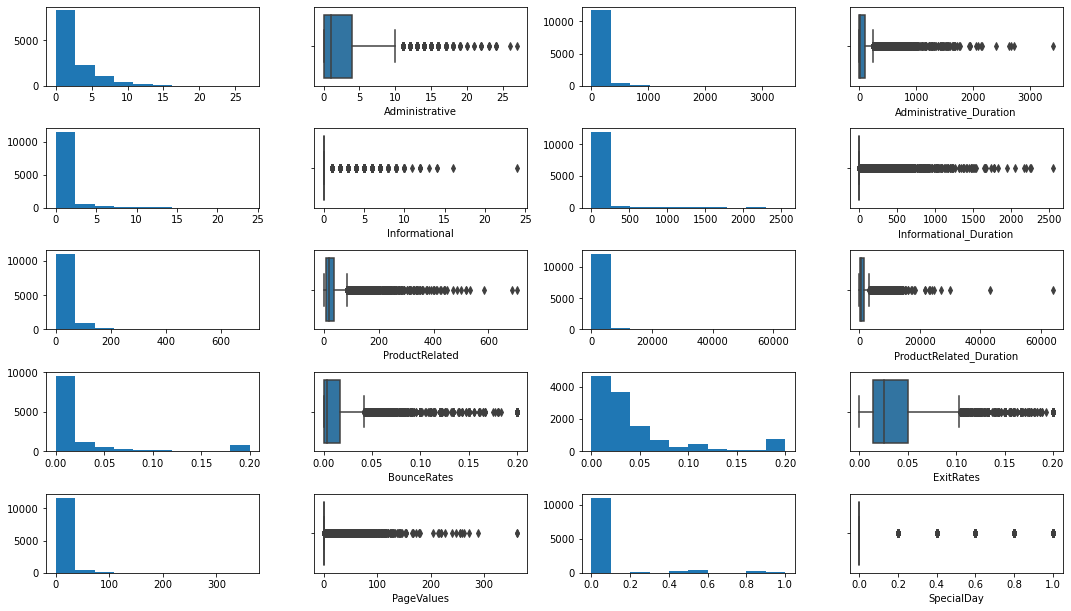

In [8]:
#show the histogram and the boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(10):
    n=2*i
    plt.subplot(12,4,n+1)
    plt.hist(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    sns.boxplot(data_num[column_num[i]])
    
plt.tight_layout()

From the above plots, we can see that all the numerical variables skew right. 'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates, ExitRates', 'PageValues' have many outliers. 'SpecialDay' is discontinuous in some ranges.

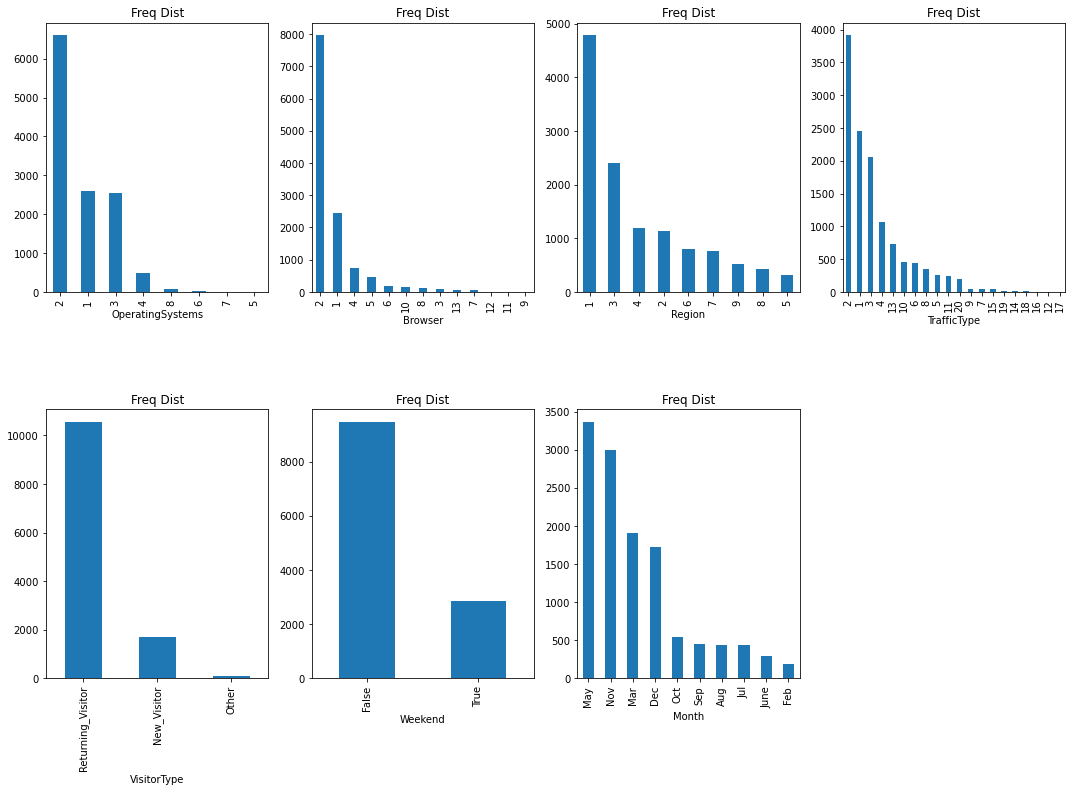

In [9]:
# show the barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(7):
    plt.subplot(3,4,i+1)
    data_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

For 'OperatingSystems', value 2 is far more than others, followed by 1 and 3;

For 'Browser', value 2 is far more than others;

For 'Region', value 1 is far more than others, followed by 3, 4, 2;

For 'TrafficType', value 2 is far more than others, followed by 1 and 3;

For 'VistorType', Returing_Visitor is far more than others, it exceeds 10,000;

For 'Weekend', False is more than Ture;

For 'Month', May and Nov are more than others, they both exceed 3000.

In [10]:
# check for duplicate use cases
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12330, dtype: bool

In [11]:
# View the correlation coefficient between numerical variables
data_num.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000


From above, We can see that there is no collinearity between all numerical variables.

## Pre-Clustering Data Preparation

In [12]:
data.shape

(12330, 17)

In [13]:
# Combine the classes with a small number of 'OperatingSystems' variable together
data.OperatingSystems.replace([5,6,7],8,inplace = True)

In [14]:
# Combine the classes with a small number of 'Browser' variable together
data.Browser.replace([10,8,3,13,7,12,11,9],6,inplace = True)

In [15]:
# Combine the classes with a small number of 'TrafficType' variable together
data.TrafficType.replace([7,15,19,14,18,16,12,17],9,inplace = True)

In [16]:
# change boolean to int
data.Weekend = data.Weekend.astype(int)

In [17]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.129116,2.261719,3.147364,4.028629,0.232603
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.937777,1.274558,2.401591,3.927427,0.422509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,6.000000,9.000000,20.000000,1.000000


Because all the numerical variables skew right, so we will standardize them with StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Standardized numeric variables
scaler = StandardScaler()
a = scaler.fit_transform(data.iloc[:,[0,1,2,3,4,5,6,7,8,9]])
a

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.29841542,
         2.56280291, -0.30882137],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.0935547 ,
        -0.31717784, -0.30882137],
       [ 0.50722805, -0.24505366,  1.17819516, ..., -0.52624805,
        -0.31717784, -0.30882137],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.30989738,
        -0.31717784, -0.30882137],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.11616835,
        -0.31717784,  4.71859801],
       [-0.39593771, -0.03998718, -0.3964779 , ..., -0.47193431,
        -0.31717784, -0.30882137]])

In [20]:
b = pd.concat([data,pd.DataFrame(a)], axis=1)
b

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,0,1,2,3,4,5,6,7,8,9
0,0,0.00,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821
1,0,0.00,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821
2,4,37.50,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,...,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821
3,4,115.70,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,...,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821
4,1,60.00,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,...,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,8,292.500000,0.000000,0.027273,0.000000,0.0,...,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,-0.308821
12326,1,9.00,1,29.5,23,1157.583333,0.007692,0.053846,0.000000,0.0,...,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,-0.308821
12327,0,0.00,0,0.0,91,4157.633333,0.010000,0.028013,0.000000,0.0,...,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,-0.308821
12328,0,0.00,0,0.0,38,1417.666667,0.016117,0.048718,0.000000,1.0,...,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,4.718598


In [21]:
# drop the duplicated columns
b.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay'],axis=1,inplace=True)
b

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,0,1,2,3,4,5,6,7,8,9
0,May,1,1,1,2,New_Visitor,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821
1,Mar,2,2,4,2,Returning_Visitor,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821
2,Nov,2,2,9,2,New_Visitor,0,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821
3,Nov,1,1,2,3,Returning_Visitor,0,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821
4,May,2,2,3,4,Returning_Visitor,0,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,Mar,2,2,1,3,Returning_Visitor,1,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,-0.308821
12326,Nov,2,2,7,2,Returning_Visitor,0,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,-0.308821
12327,Jul,2,2,1,13,Returning_Visitor,0,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,-0.308821
12328,May,2,6,3,6,Returning_Visitor,1,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,4.718598


In [22]:
b.columns = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
b

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,May,1,1,1,2,New_Visitor,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821
1,Mar,2,2,4,2,Returning_Visitor,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821
2,Nov,2,2,9,2,New_Visitor,0,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821
3,Nov,1,1,2,3,Returning_Visitor,0,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821
4,May,2,2,3,4,Returning_Visitor,0,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,Mar,2,2,1,3,Returning_Visitor,1,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,-0.308821
12326,Nov,2,2,7,2,Returning_Visitor,0,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,-0.308821
12327,Jul,2,2,1,13,Returning_Visitor,0,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,-0.308821
12328,May,2,6,3,6,Returning_Visitor,1,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,4.718598


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
# convert 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType' to DUMMY VARIABLES
enc = OneHotEncoder(categories='auto').fit(b.iloc[:,[0,1,2,3,4,5]])
result = enc.transform(b.iloc[:,[0,1,2,3,4,5]]).toarray()
result

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
enc.get_feature_names()

array(['x0_Aug', 'x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar',
       'x0_May', 'x0_Nov', 'x0_Oct', 'x0_Sep', 'x1_1', 'x1_2', 'x1_3',
       'x1_4', 'x1_8', 'x2_1', 'x2_2', 'x2_4', 'x2_5', 'x2_6', 'x3_1',
       'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x3_9',
       'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_8', 'x4_9',
       'x4_10', 'x4_11', 'x4_13', 'x4_20', 'x5_New_Visitor', 'x5_Other',
       'x5_Returning_Visitor'], dtype=object)

In [26]:
c = pd.concat([b,pd.DataFrame(result)],axis=1)
c

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative,Administrative_Duration,Informational,...,34,35,36,37,38,39,40,41,42,43
0,May,1,1,1,2,New_Visitor,1,-0.696993,-0.457191,-0.396478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Mar,2,2,4,2,Returning_Visitor,0,-0.696993,-0.457191,-0.396478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Nov,2,2,9,2,New_Visitor,0,0.507228,-0.245054,1.178195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Nov,1,1,2,3,Returning_Visitor,0,0.507228,0.197324,-0.396478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,May,2,2,3,4,Returning_Visitor,0,-0.395938,-0.117771,0.390859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,Mar,2,2,1,3,Returning_Visitor,1,0.206173,0.380046,-0.396478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,Nov,2,2,7,2,Returning_Visitor,0,-0.395938,-0.406278,0.390859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12327,Jul,2,2,1,13,Returning_Visitor,0,-0.696993,-0.457191,-0.396478,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12328,May,2,6,3,6,Returning_Visitor,1,-0.696993,-0.457191,-0.396478,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# drop the duplicated columns
c.drop(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'],axis=1,inplace=True)

In [28]:
c

,Weekend,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,34,35,36,37,38,39,40,41,42,43
0,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12327,0,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12328,1,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
c.columns = ['Weekend','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar',
             'May', 'Nov', 'Oct', 'Sep','OS1', 'OS2', 'OS3','OS4', 'OS8', 'B1', 'B2', 'B4', 'B5', 'B6', 'R1','R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9','TT1', 'TT2', 'TT3', 'TT4', 'TT5', 'TT6', 'TT8', 'TT9','TT10', 'TT11', 'TT13', 'TT20', 'New_Visitor', 'Other','Returning_Visitor']
c

,Weekend,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,TT6,TT8,TT9,TT10,TT11,TT13,TT20,New_Visitor,Other,Returning_Visitor
0,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12327,0,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12328,1,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Cluster Modeling

### Hierarchical Clustering

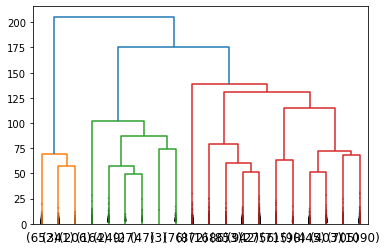

In [30]:
# draw a dendrogram to choose k
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(c, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

The optimal number of clusters by noticing which vertical lines can be cut by horizontal line without intersecting a cluster and covers the maximum distance, for this dendrogram, it is obvious that 3 is the best choice.

In [31]:
# choose k = 3, and make a hierarchical clustering model
from sklearn.cluster import (
    AgglomerativeClustering,
)
ag = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(c)

AgglomerativeClustering(n_clusters=3)

### K-Means Clustering

C:\Users\asus\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

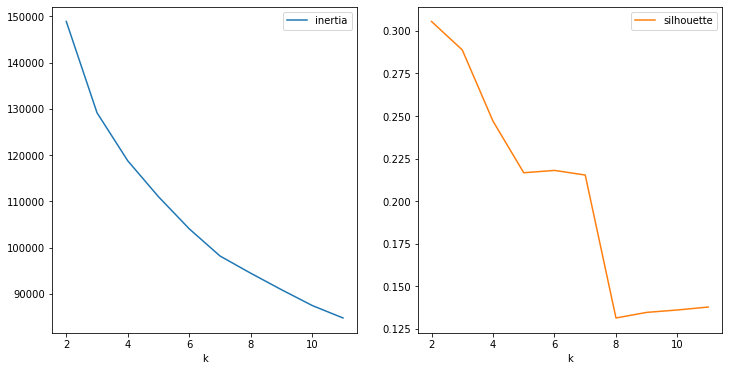

In [32]:
# draw a elbow plot and a silhouette plot to choose k.
from sklearn.cluster import KMeans
from sklearn import metrics
inertias = []
sils = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(c)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(c, k2.labels_)
    )
fig, ax = plt.subplots(figsize=(12, 6))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(1, 2))
)

As you can see, there is an elbow at $k=3$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=3$ is a pretty good choice.
As you can see, the right visualization is much richer than the previous one: in particular, although it confirms that $k=2$ is a very good choice.

Compared to the dendrogram, the elbow plot has the same k, however, the silhouette plot gets a different k.

In [33]:
# choose k = 2, and make a kmeans clustering model
kmeans = KMeans(n_clusters=2, random_state=42).fit(c)

## Post-Clustering Exploratory Data Analysis

In [34]:
# get cluster outcomes
l = kmeans.labels_
l

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
g = pd.DataFrame(l)
g

,0
0,1
1,1
2,1
3,1
4,1
...,...
12325,1
12326,1
12327,1
12328,1


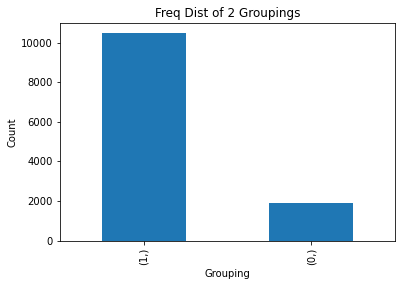

In [36]:
# create a bar plot for the 2 clustering groupings
bplt1 = g.value_counts().plot.bar(title = "Freq Dist of 2 Groupings")
plt.xlabel('Grouping')
plt.ylabel('Count')
bplt1;

From this bar blot, most of the observations are sorted into the grouping '1'.

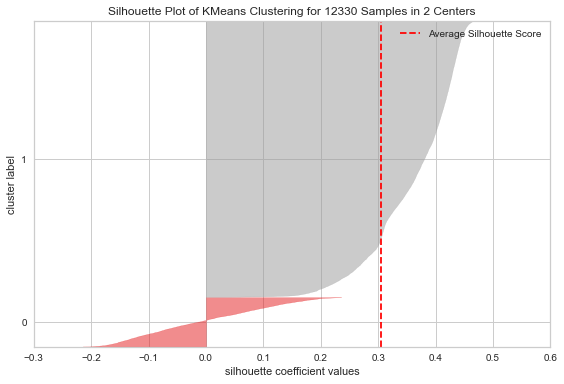

In [37]:
# create a silhouette plot for all observations.
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
sil = SilhouetteVisualizer(
      KMeans(n_clusters=2, random_state=42)
      )
sil.fit(c)
sil.finalize()
plt.tight_layout()

From this plot, we can see that grouping 1 is a well-classified group, its silhouette coefficients all exceed 0, and some exceed the average silhouette coefficient. However, grouping 0 is a bad-classified group, its silhouette coefficients are under average silhouette coefficient, some even under 0.

## Clustering Output vs. Actual Labels

In [38]:
c['Revenue'] = g

In [39]:
c

,Weekend,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,TT8,TT9,TT10,TT11,TT13,TT20,New_Visitor,Other,Returning_Visitor,Revenue
0,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12326,0,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12327,0,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
12328,1,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [40]:
r = pd.read_csv('https://raw.githubusercontent.com/675874815/DAV-5401/master/Project2_Data_Labels.csv')
r.head()

,Revenue
0,True
1,False
2,False
3,False
4,False


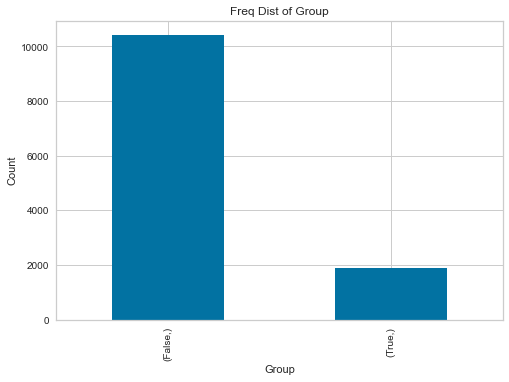

In [41]:
# create a bar plot for the 2 actual groupings
bplt2 = r.value_counts().plot.bar(title = "Freq Dist of Group")
plt.xlabel('Group')
plt.ylabel('Count')
bplt2;

In [42]:
c['V_Revenue'] = r

In [43]:
c

,Weekend,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,TT9,TT10,TT11,TT13,TT20,New_Visitor,Other,Returning_Visitor,Revenue,V_Revenue
0,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,True
1,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,False
2,0,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,False
3,0,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,False
4,0,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,False
12326,0,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,False
12327,0,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,False
12328,1,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,False


In [44]:
# change boolean to int
c.V_Revenue = c.V_Revenue.astype(int)

In [45]:
c.V_Revenue.replace(1,'zero',inplace = True)

In [46]:
c.V_Revenue.replace(0,'one',inplace = True)

In [47]:
c.V_Revenue.replace('zero',0,inplace = True)

In [48]:
c.V_Revenue.replace('one',1,inplace = True)

In [49]:
c

,Weekend,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,TT9,TT10,TT11,TT13,TT20,New_Visitor,Other,Returning_Visitor,Revenue,V_Revenue
0,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
1,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,0,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
3,0,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
4,0,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
12326,0,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
12327,0,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
12328,1,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [50]:
# check whether clustering outcomes are the same as the actual for all observations.
co = c.V_Revenue == c.Revenue
co

0        False
1         True
2         True
3         True
4         True
         ...  
12325     True
12326     True
12327     True
12328     True
12329     True
Length: 12330, dtype: bool

In [51]:
# calculate the accuracy
co.sum()/len(co)

0.7778588807785888

We can see that compared to the actual classification, our clustering outcomes have 70% accuracy

## SVM Modeling

In [52]:
x = c[['Weekend','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar',
         'May', 'Nov', 'Oct', 'Sep','OS1', 'OS2', 'OS3','OS4', 'OS8', 'B1', 'B2', 'B4', 'B5', 'B6', 'R1','R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9','TT1', 'TT2', 'TT3', 'TT4', 'TT5', 'TT6', 'TT8', 'TT9','TT10', 'TT11', 'TT13', 'TT20', 'New_Visitor', 'Other','Returning_Visitor']]
y = c.V_Revenue

In [53]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [54]:
result = MIC(x,y)
result

array([0.        , 0.01391235, 0.01898689, 0.00847697, 0.00866936,
       0.0256351 , 0.03282594, 0.02196502, 0.04107993, 0.1647136 ,
       0.00637883, 0.        , 0.        , 0.00501443, 0.00213736,
       0.00263821, 0.008395  , 0.00402414, 0.01192111, 0.00135505,
       0.        , 0.00282232, 0.00091954, 0.00240019, 0.        ,
       0.00069055, 0.00558723, 0.00045814, 0.00125495, 0.00360583,
       0.        , 0.00391549, 0.        , 0.00060912, 0.        ,
       0.        , 0.00317005, 0.        , 0.        , 0.00082045,
       0.00472467, 0.00941001, 0.00377653, 0.        , 0.0004859 ,
       0.00078204, 0.        , 0.        , 0.0033218 , 0.00058617,
       0.        , 0.00518134, 0.00692256, 0.        , 0.00380361])

In [55]:
[*zip(c.columns,result)]

[('Weekend', 0.0),
 ('Administrative', 0.013912353627931973),
 ('Administrative_Duration', 0.018986892943443134),
 ('Informational', 0.008476967313332695),
 ('Informational_Duration', 0.008669358316401476),
 ('ProductRelated', 0.0256351015141425),
 ('ProductRelated_Duration', 0.03282593516993648),
 ('BounceRates', 0.021965020900311938),
 ('ExitRates', 0.041079933115257594),
 ('PageValues', 0.16471359704856536),
 ('SpecialDay', 0.006378834787988952),
 ('Aug', 0.0),
 ('Dec', 0.0),
 ('Feb', 0.005014427913434982),
 ('Jul', 0.0021373567548796935),
 ('June', 0.0026382066500167944),
 ('Mar', 0.008394997227743728),
 ('May', 0.0040241397601816775),
 ('Nov', 0.011921107279436738),
 ('Oct', 0.0013550549496061937),
 ('Sep', 0.0),
 ('OS1', 0.002822319317438593),
 ('OS2', 0.0009195425487826814),
 ('OS3', 0.0024001901166756934),
 ('OS4', 0.0),
 ('OS8', 0.0006905510509609414),
 ('B1', 0.0055872341353950805),
 ('B2', 0.000458136083925087),
 ('B4', 0.0012549466160627354),
 ('B5', 0.003605827299150377),


Through the mutual information method, we find that some variables' values are equal to 0, so these variables can't be used as explanatory variables in the following modeling.

From the above MIC scores, we set out the first data set including some attributes that their MIC scores are not equal to 0 and 'V_Revenue' as the response variable. 
The second data set includes some different attributes that their MIC scores are not equal to 0 and 'V_Revenue' as the response variable.

In [56]:
x1 = c[['Weekend', 'Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates','PageValues', 'SpecialDay', 'Aug', 'Feb', 'Jul', 'June', 'Mar','May', 'Nov', 'OS8', 'B1', 'B2', 'B6', 'R1','R2', 'R4', 'R8','TT1', 'TT2', 'TT3', 'TT6', 'TT8', 'TT13', 'TT20', 'New_Visitor','Returning_Visitor']]

In [57]:
x2 = c[['Weekend', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Aug', 'Feb', 'Jul', 'June', 'Mar','May', 'Nov', 'OS8', 'B1', 'B2', 'B6', 'R1','R2', 'R4', 'R8','TT1', 'TT2', 'TT3', 'TT6', 'TT8', 'TT13', 'TT20', 'New_Visitor','Returning_Visitor']]

In [58]:
from sklearn.model_selection import train_test_split
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=12)

In [59]:
# calculate the null error rate
ner1 = 1 - ( y1_train.values.sum() / y1_train.shape[0])
ner1

0.15467500868960726

In [60]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=12)

In [61]:
# calculate the null error rate
ner2 = 1 - ( y2_train.values.sum() / y2_train.shape[0])
ner2

0.15467500868960726

In [62]:
from sklearn.svm import SVC

In [63]:
sv1 = SVC(kernel='rbf',gamma='auto')
sv1.fit(X1_train, y1_train)

SVC(gamma='auto')

In [64]:
sv1.score(X1_train, y1_train)

0.8966516046808017

The null error rate for data set 1 is 15.5%. The model we just created has an accuracy score of 89.7%, so sv1 appers to be useful.

In [65]:
sv2 = SVC(kernel='rbf',gamma='auto')
sv2.fit(X2_train, y2_train)

SVC(gamma='auto')

In [66]:
sv2.score(X2_train, y2_train)

0.8935233460780906

The null error rate for data set 2 is 15.5%. The model we just created has an accuracy score of 89.4%, so sv2 appers to be useful.

## Select Models
we will use accuracy, precision, recall and f1 to choose a preferred model.

In [68]:
from sklearn.model_selection import cross_val_score
f1_1 = cross_val_score(sv1,X1_train,y1_train,cv=10,scoring='f1').mean()
f1_1

0.9381087846642633

In [69]:
f1_2 = cross_val_score(sv2,X2_train,y2_train,cv=10,scoring='f1').mean()
f1_2

0.9365724653325875

In [70]:
accuracy1 = cross_val_score(sv1,X1_train,y1_train,cv=10).mean()
accuracy1

0.8921313731170338

In [71]:
accuracy2 = cross_val_score(sv2,X2_train,y2_train,cv=10).mean()
accuracy2

0.8895822604180079

In [72]:
precision1 = cross_val_score(sv1,X1_train,y1_train,cv=10,scoring='precision').mean()
precision1

0.9108324133708642

In [73]:
precision2 = cross_val_score(sv2,X2_train,y2_train,cv=10,scoring='precision').mean()
precision2

0.9102655170704284

In [74]:
recall1 = cross_val_score(sv1,X1_train,y1_train,cv=10,scoring='recall').mean()
recall1

0.9671044966833907

In [75]:
recall2 = cross_val_score(sv2,X2_train,y2_train,cv=10,scoring='recall').mean()
recall2

0.9645004415882144

| Metric        | Model sv1 | Model sv2 
| ------------- | ------- | ------- 
| # Indep. Vars |  32     |   32         
| Accuracy      | 0.8921  | 0.7863      
| Precision     | 0.9108  | 0.9102   
| Recall   | 0.9671  | 0.9645      
| F1 Score      | 0.9381  | 0.9365    

From above, we can see that with the same number of explanatory variables, the accuracy, precision, recall and fl of sv1 are all higher than sv2, so sv1 is the best model. 

## Clustering + SVM Output vs. Actual Labels

In [324]:
# predict class labels for the test set
predicted1 = sv1.predict(X1_test)
predicted1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [326]:
# check whether the prediction outcomes are the same as the actual for all observations.
co2 = predicted1 == y1_test
co2

7949     True
4113     True
351      True
4310     True
1598     True
         ... 
12092    True
681      True
6612     True
5701     True
3102     True
Name: V_Revenue, Length: 3699, dtype: bool

In [327]:
# calculate the classification accuracy
co2.sum()/len(co2)

0.8959178156258448

We can see that compared to the actual classification, our SVM model's predictive outcomes have 90% accuracy

## Conclusion

Through the above, we found that although the number of clusters is selected through the dendrogram, the elbow plot and the silhouette plot, the prediction accuracy is not very high, some observations are still misclassified. In contrast, the classification effect of SVM is much better than clustering, It reaches a prediction accuracy of 90%.